In [ ]:
#importing all the necessary libraries to perform the crops prediction
import numpy as np
import pandas as pd
#importing the libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

In [ ]:
#loading the csv file to the pandas dataframe
df=pd.read_csv("Crop_recommendation (2).csv")
#first five rows in he dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#number of datas and features
df.shape

(8800, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8800 non-null   int64  
 1   P            8800 non-null   int64  
 2   K            8800 non-null   int64  
 3   temperature  8800 non-null   float64
 4   humidity     8800 non-null   float64
 5   ph           8800 non-null   float64
 6   rainfall     8800 non-null   float64
 7   label        8800 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 550.1+ KB


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

DATA ANALYSIS

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,55.080909,51.444091,40.482727,26.774572,71.443720,6.609499,100.669506
std,37.059675,27.973451,38.555468,5.322922,22.761454,0.877838,56.017885
min,0.000000,4.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,25.000000,30.000000,20.000000,23.826868,58.192235,6.081469,60.745835
50%,42.000000,51.000000,29.000000,26.924435,79.960550,6.566980,90.402966
75%,89.000000,66.000000,46.000000,29.774256,89.417267,7.086870,122.704272
max,149.000000,150.000000,206.000000,46.732778,104.980970,10.233143,298.560117


In [ ]:
sns.set()

<ipython-input-10-b35f96ebb14a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
<ipython-input-10-b35f96ebb14a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})


<Axes: xlabel='ph', ylabel='Density'>

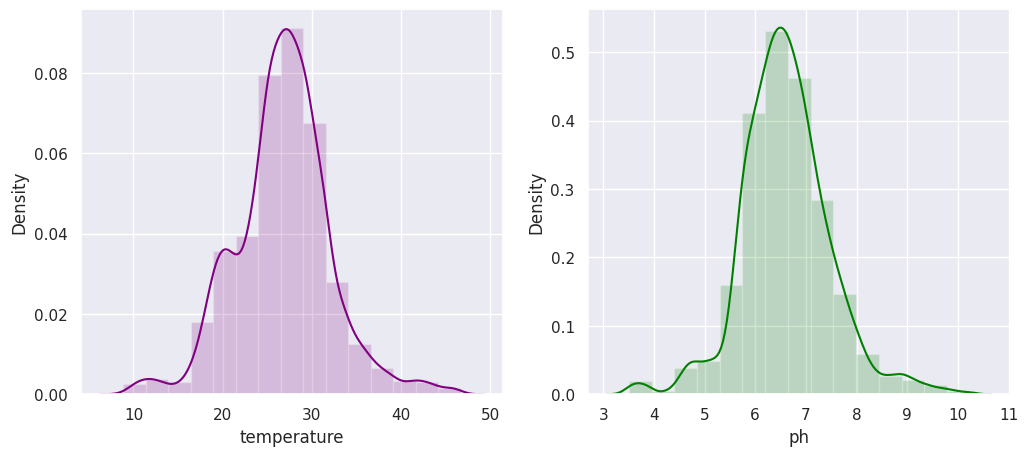

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<ipython-input-11-7875c270b428>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label',data=df, palette="plasma_r")


<Axes: xlabel='count', ylabel='label'>

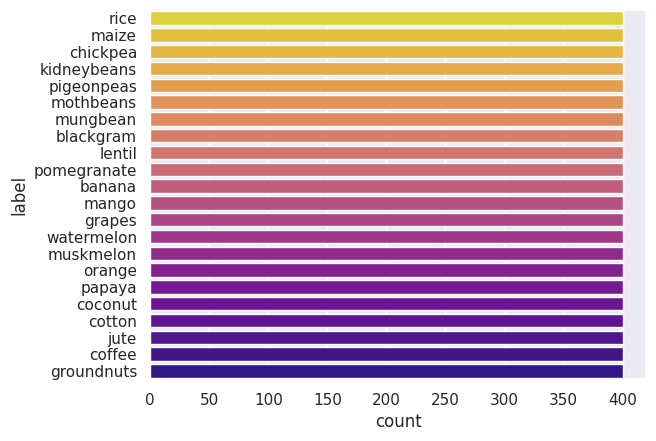

In [ ]:
#Checking if the data is balanced or not
sns.countplot(y='label',data=df, palette="plasma_r")

In [ ]:
sns.pairplot(df, hue = 'label')

In [ ]:
# from the pairplot we have some insights on the dataset
#During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).
#Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season

#Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!

#Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

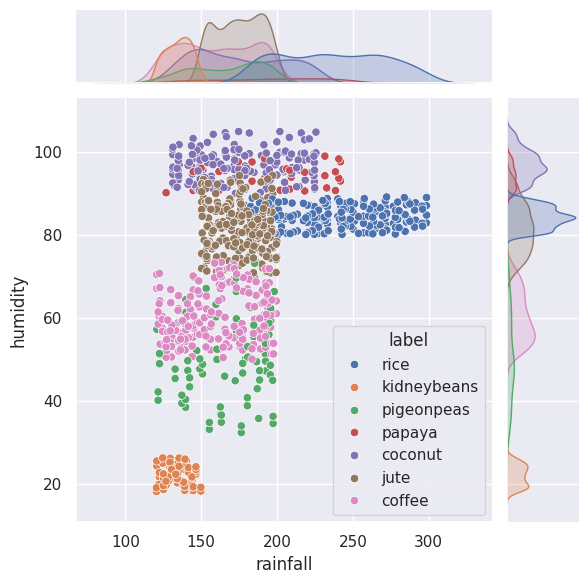

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

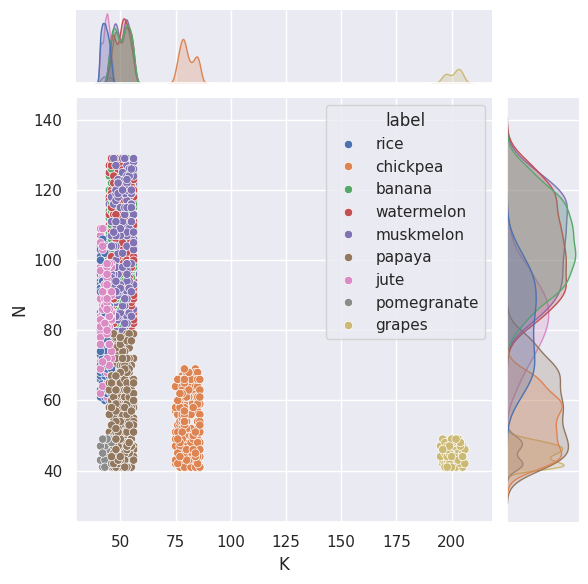

In [ ]:
#This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
#These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.
sns.jointplot(x="K",y="N",data=df[(df["N"]>40)&(df["K"]>40)],hue="label")

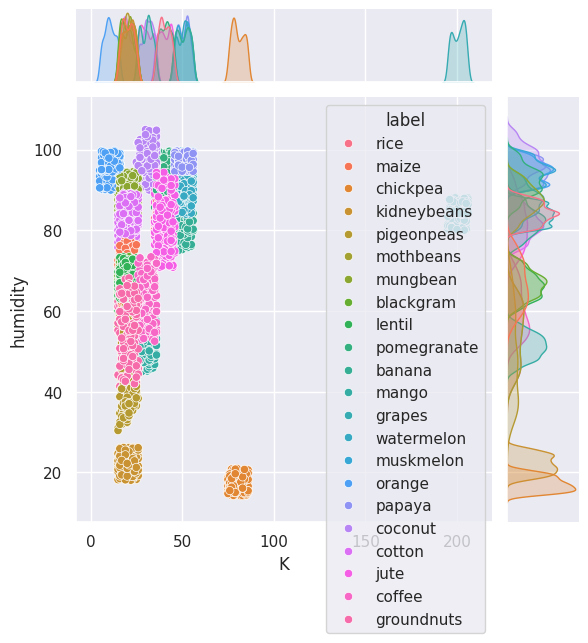

In [ ]:
# plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)
sns.jointplot(x="K", y="humidity", data=df,hue="label")

<Axes: xlabel='ph', ylabel='label'>

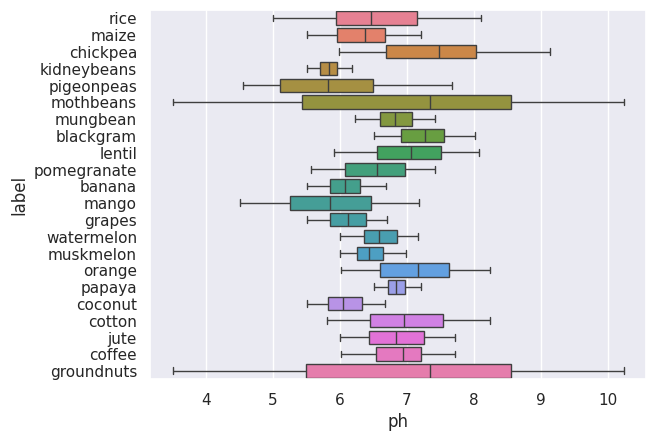

In [ ]:
# for crops to grow the ph value is critical when it comes to soil. A stability between 6 and 7 is preffered
sns.boxplot(x="ph",y="label",data=df,hue="label")

<Axes: xlabel='P', ylabel='label'>

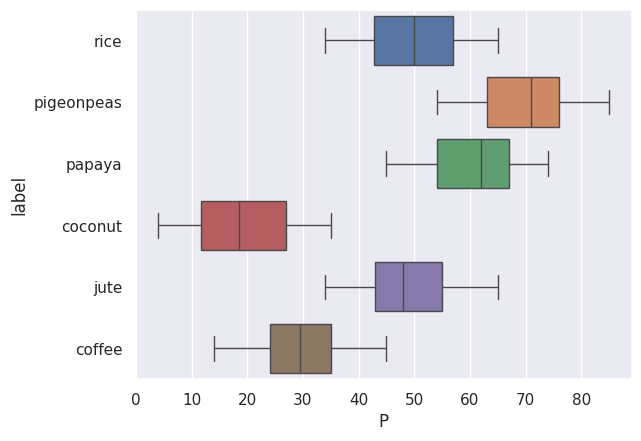

In [ ]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150],hue="label")
# from we can find that Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<Axes: xlabel='K', ylabel='humidity'>

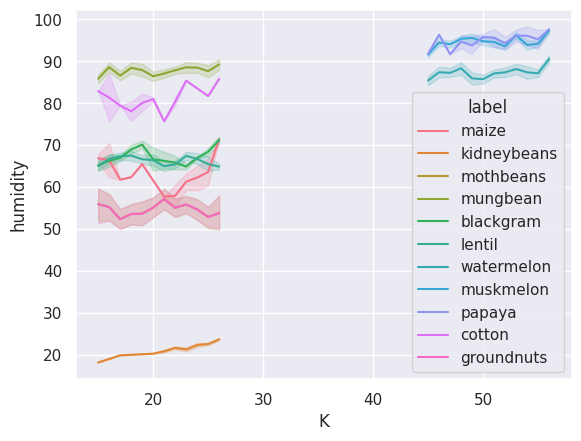

In [ ]:
#From the above insights further analyzing the phosphorous levels
sns.lineplot(x="K",y="humidity",data=df[(df["rainfall"]<65)],hue="label")

DATA PRE-PROCESSING

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
x=df[['N','P','K','temperature','humidity','ph','rainfall']]

<Axes: >

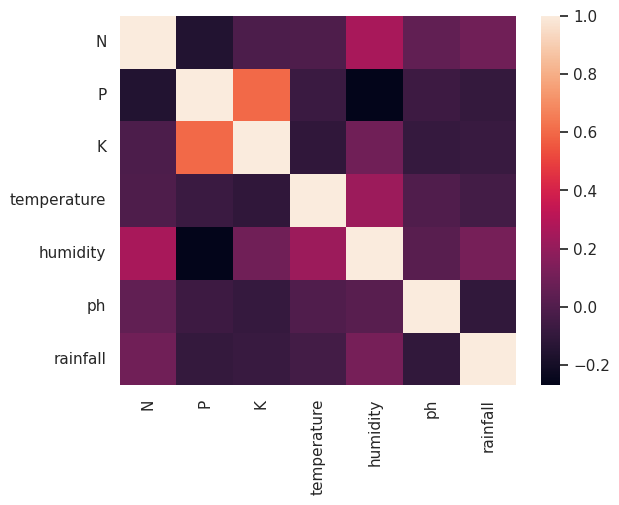

In [ ]:
sns.heatmap(x.corr())

In [ ]:
#splitting the test and train data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)
scaler = MinMaxScaler()
x_trains = scaler.fit_transform(x_train)
# we must apply the scaling to the test set as well that we are computing for the training set
x_tests= scaler.transform(x_test)
print(x.shape,x_trains.shape,x_tests.shape)

(8800, 7) (7040, 7) (1760, 7)


In [ ]:
# importing the machine learning models to predict the data
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_trains,y_train)
predict=knn.predict(x_tests)
accuracy=accuracy_score(predict,y_test)
print(accuracy)

0.91875


In [ ]:
print(knn.predict([[89,44,45,199,86,21,6.3]]))

[6]


<Axes: >

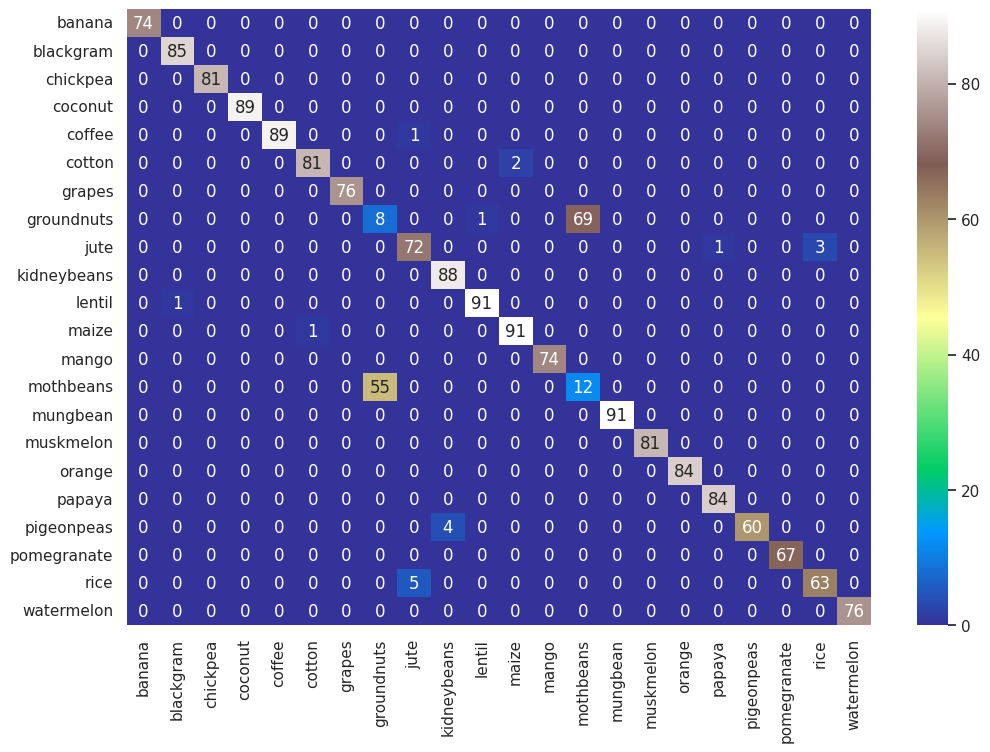

In [ ]:
# checking using the confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(x_tests))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

In [ ]:
# using the GRadiant boost classifier
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_trains, y_train)
crop_prediction_model=grad.score(x_tests,y_test)
print('Gradient Boosting accuracy :',crop_prediction_model)

Gradient Boosting accuracy : 0.9221590909090909


SAVING THE MODEL AS PICKEL FILE

In [ ]:
import pickle
file ='knn.pkl'
pickle.dump(knn,open(file,'wb'))

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
%%writefile Crop_recommendation_app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Load the crop recommendation model
with open('knn.pkl', 'rb') as pkl:
    crop_classifier = pickle.load(pkl)

# Function to predict crop recommendation
def predict_crop():
    st.sidebar.title("Crop Recommendation")

    style = """<div style='background-color: #4CAF50; padding:10px'>
                <h1 style ='color:white'><Center>Crop Recommendation</h1>
                </div> """
    st.markdown(style, unsafe_allow_html=True)

    left, right = st.columns((2,2))
    N = left.number_input('Enter Nitrogen level', step=1.0, value=0.0)
    P = right.number_input('Enter Phosphorus level', step=1.0, value=0.0)
    K = left.number_input('Enter Potassium level', step=1.0, value=0.0)
    rainfall = right.number_input('Enter Rainfall in mm', step=1.0, value=0.0)
    humidity = left.number_input('Enter Humidity', step=1.0, value=0.0)
    temperature = right.number_input('Enter temperature in celcius', step=1.0, value=0.0)
    ph = left.number_input('Enter ph', step=1.0, value=0.0)
    predict_button = st.button('Recommend Crop')

    # When predict button is clicked
    if predict_button:
        # Reshape input data to (1, 5) array
        input_data = [[N, P, K,temperature,humidity,ph,rainfall]]

        # Make prediction
        res = crop_classifier.predict(input_data)

        # Display recommended crop
        recommended_crop = res

        if recommended_crop =="rice":
            st.success("Recommended Crop: rice")
        elif recommended_crop == "maize":
            st.success("Recommended Crop: Maize")
        elif recommended_crop == "chickpea":
            st.success("Recommended Crop: Chickpea")
        elif recommended_crop == "kidneybeans":
            st.success("Recommended Crop: Kidney Beans")
        elif recommended_crop == "pigeonpeas":
            st.success("Recommended Crop: Pigeon Peas")
        elif recommended_crop == "mango":
            st.success("Recommended Crop: Mango")
        elif recommended_crop == "cotton":
            st.success("Recommended Crop: Cotton")
        elif recommended_crop == "banana":
            st.success("Recommended Crop: Banana")
        elif recommended_crop == "grapes":
            st.success("Recommended Crop: Grapes")
        elif recommended_crop == "Watermelon":
            st.success("Recommended Crop: Watermelon")
        elif recommended_crop == "blackgram":
            st.success("Recommended Crop: blackgram")
        elif recommended_crop == "coconut":
            st.success("Recommended Crop: coconut")
        elif recommended_crop ==  "coffee":
            st.success("Recommended Crop: coffee")
        elif recommended_crop == "groundnuts":
            st.success("Recommended Crop: groundnuts")
        elif recommended_crop == "jute":
            st.success("Recommended Crop: jute")
        elif recommended_crop == "lentil":
            st.success("Recommended Crop: lentil")
        elif recommended_crop == "mothbeans":
            st.success("Recommended Crop: mothbeans")
        elif recommended_crop == "muskmelon":
            st.success("Recommended Crop: muskmelon")
        elif recommended_crop == "orange":
            st.success("Recommended Crop: orange")
        elif recommended_crop == "papaya":
            st.success("Recommended Crop: papaya")
        elif recommended_crop == "pomegranate":
            st.success("Recommended Crop: pomegranate")
# Streamlit homepage
def main():
    st.set_page_config(
        page_title="Crop recommendation App",
        page_icon="💊",
        layout="wide"
    )

    st.title("Crop recommendation App")

    # Create a sidebar selection box for choosing the prediction model
    model_choice = st.sidebar.selectbox("Choose a Model", ("Home", "Crop Recommendation"))

    if model_choice == "Home":
        st.markdown("Welcome to the Health Prediction App! Please select a prediction model from the sidebar.")
    elif model_choice == "Crop Recommendation":
        predict_crop()
if __name__ == '__main__':
    main()


Writing Crop_recommendation_app.py


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.106.166.93


In [ ]:
! streamlit run  Crop_recommendation_app.py & npx localtunnel --port 8501